# Confirmed COVID-19 Cases Comparison: Global
Author: [Mayher Sandhu](https://www.linkedin.com/in/mayher-sandhu/)

Contributors: [Qing (David) Zhang](https://www.linkedin.com/in/qizhang2/) and Michael Wiley

In [2]:
from urllib import request
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

plt.rcParams["figure.figsize"] = (20,10)

## The Data
We pull the data from John Hopkin's to better analyze and plot each respective country. We use a pandas dataframe to store these values to make it easier to parse and analyze the data.

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,7215.295455,7485.571970,7788.083333,8153.170455,8485.568182,8779.386364,9095.079545,9364.613636,9656.412879,9937.170455
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,40763.518495,42450.795915,44263.148610,46362.495521,48389.901654,50329.621230,52089.315934,53671.774238,55416.146689,57124.533362
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.500000,40.750000,48.000000,48.750000,51.250000,55.000000,55.000000,59.250000,64.000000,64.500000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,294.500000,304.000000,319.000000,331.500000,335.000000,339.000000,341.500000,343.500000,352.500000,357.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1352.000000,1379.750000,1407.500000,1533.250000,1575.500000,1615.750000,1654.250000,1678.500000,1737.500000,1787.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,580619.000000,607670.000000,636350.000000,667592.000000,699706.000000,732197.000000,758809.000000,784326.000000,812036.000000,839675.000000


getCountry: get the table of values associated with the country name specified

In [4]:
def getCountry(country):
    CountryData = data[data['Country/Region']==country]
    return CountryData

getValues: parse the values from the table we get from getCountry

let's ignore these preceding columns so we focus on only the values

In [5]:
def getValues(Data):
    DataValues = []
    for column in Data:
        if column=='Province/State':
            print("state column, ignoring")
            continue
        elif column=='Country/Region':
            print("country column, ignoring")
            continue
        elif column=='Lat':
            print("lat column, ignoring")
        elif column=='Long':
            print("long column, ignoring")
        else:
            item = int(Data[column])
            DataValues.append(item)
    return DataValues

## Italy's Dataset 

Lets test these defined functions to gather the confirmed cases for Italy since they have the highest number of confirmed case.

In [6]:
ItalyData = getCountry('Italy')
ItalyValues = getValues(ItalyData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [7]:
ItalyData

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327


ItalyData is the data frame that we get. We have preceding zeroes which indicate that COVID-19 had not affected this area, yet.

In [8]:
print(ItalyValues)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176, 74386, 80589, 86498, 92472, 97689, 101739, 105792, 110574, 115242, 119827, 124632, 128948, 132547, 135586, 139422, 143626, 147577, 152271, 156363, 159516, 162488, 165155, 168941, 172434, 175925, 178972, 181228, 183957, 187327]


ItalyValues is the array of values we parse from the data set. Now, we can plot, calculate, and play with this data.

In [9]:
USData = getCountry('US')
USValues = getValues(USData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [10]:
SpainData = getCountry('Spain')
SpainValues = getValues(SpainData)

GermanyData = getCountry('Germany')
GermanyValues = getValues(GermanyData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring
state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [11]:
SingaporeData = getCountry('Singapore')
SingaporeValues = getValues(SingaporeData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


Majority of the global data is defined in one row. After we get the respective data table and parse the values, we can plot these numbers using the matplotlib package.

# Total Number of confirmed cases

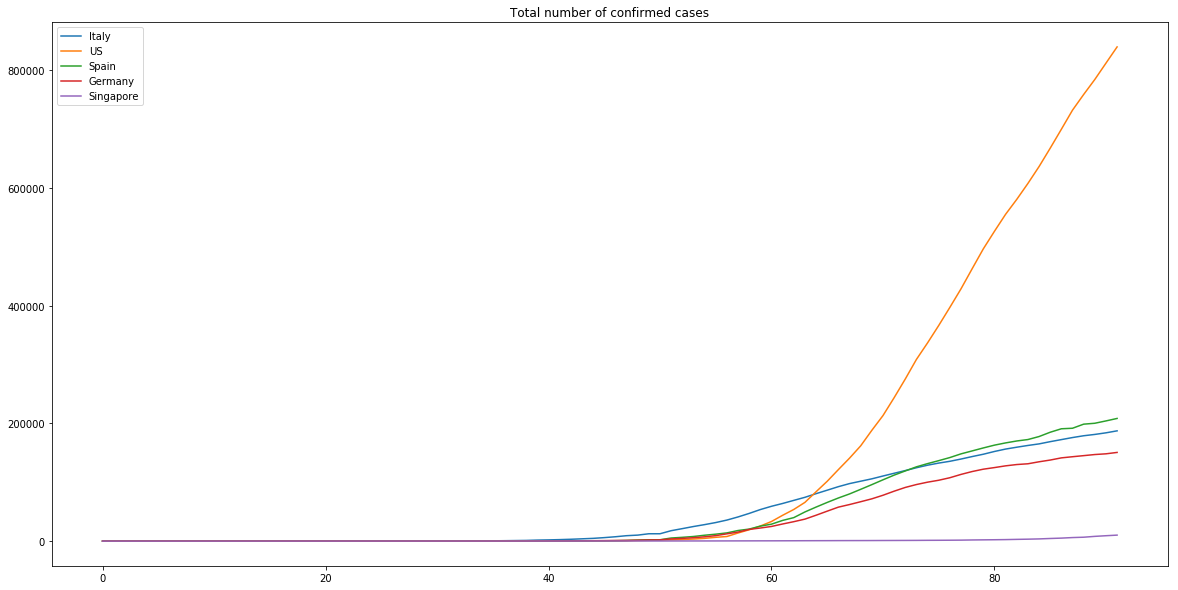

In [12]:
plt.title("Total number of confirmed cases")
plt.plot(ItalyValues, label="Italy")
plt.plot(USValues, label="US")
plt.plot(SpainValues, label="Spain")
plt.plot(GermanyValues, label="Germany")
plt.plot(SingaporeValues, label="Singapore")
plt.legend()
plt.show()

The graph above illustrates the total number of confirmed cases for Italy, the US, Spain, and Germany. US is leading in the number of confirmed cases while Italy, Spain and Germany are performing very similarly.

## Standardize Values: Per Million
The issue that the above graph illustrated is we have an inaccurate comparison between the countries. The US has a bigger population than Italy's, so naturally it will have a higher rate of infection. We need to put these values on the same scale. Here are some techniques we considered:

- per million
    - Divide the values so that the total scale is out of 1 million
- % of population
    - Divide the values so that the cases are representative of the percent of the population of the country
- compared to US population
    - Multiply the values keeping US as the base. For example, US is about 5 times as large as Italy so we will multiply each value by 5.

countryScale: adjust the confirmed cases value to have each data point represent the confirmed cases per million

- US confirmed = 580,619
- US population = 328,200,000 
- Pop = 328,200,000/328.2 = 1 mil
- NewValue = Value/328.2

In [13]:
def countryScale(DataValues, Pop):
    CountryScale = []
    scale = Pop/1000000
    for d in DataValues:
        CountryScale.append(d/scale)
    return CountryScale

In [14]:
italyPop = 60360000
usPop = 328200000
spainPop = 46940000
germanyPop = 83020000
singaporePop = 5369000

ItalyScale = countryScale(ItalyValues, italyPop)
USScale = countryScale(USValues, usPop)
SpainScale = countryScale(SpainValues, spainPop)
GermanyScale = countryScale(GermanyValues, germanyPop)
SingaporeScale = countryScale(SingaporeValues, singaporePop)

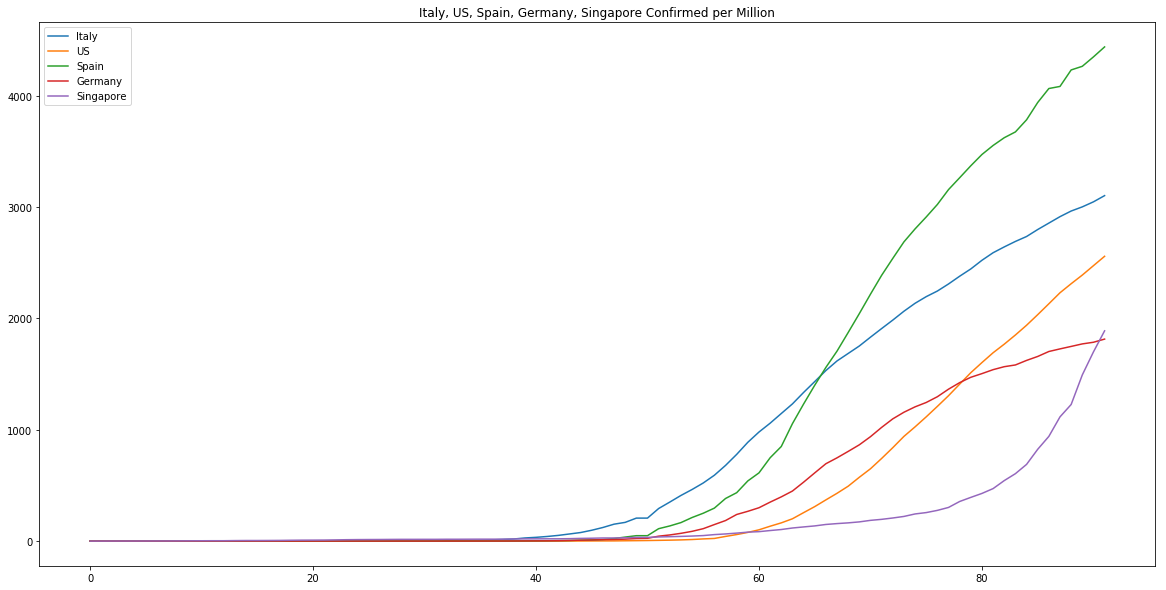

In [15]:
plt.title("Italy, US, Spain, Germany, Singapore Confirmed per Million")
plt.plot(ItalyScale, label="Italy")
plt.plot(USScale, label="US")
plt.plot(SpainScale, label="Spain")
plt.plot(GermanyScale, label="Germany")
plt.plot(SingaporeScale, label="Singapore")
plt.legend()
plt.show()

Now we have a more accurate illustration of these cases. So although the numbers for Spain and Italy are far less than US's, their per million rate is much more than the US.

# Overall: Linear Regression
I wanted to calculate the overall rate of the confirmed cases. I start out by applying a linear regression to the total number of confirmed cases per country.

In order to feed these values into the LinearRegression package, we need X values. I just set these as the index values.

I called the fit function to fit the LinearRegression package on the respective country's values. Then I called the predict function to generate the linear functions.

getIndex: generate index values for the respective data set

In [16]:
def getIndex(Data):
    count = 0
    Index = []
    for i in Data:
        Index.append(count)
        count = count+1
    return Index

In [17]:
ItalyRegressor = LinearRegression()
ItalyIndex = getIndex(ItalyValues)

ItalyRegressor.fit(np.array(ItalyIndex).reshape(-1,1), np.array(ItalyValues).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
USRegressor = LinearRegression()
USIndex = getIndex(USValues)

USRegressor.fit(np.array(USIndex).reshape(-1,1), np.array(USValues).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
ItalyPrediction = ItalyRegressor.predict(np.array(ItalyIndex).reshape(-1,1))
USPrediction = USRegressor.predict(np.array(USIndex).reshape(-1,1))

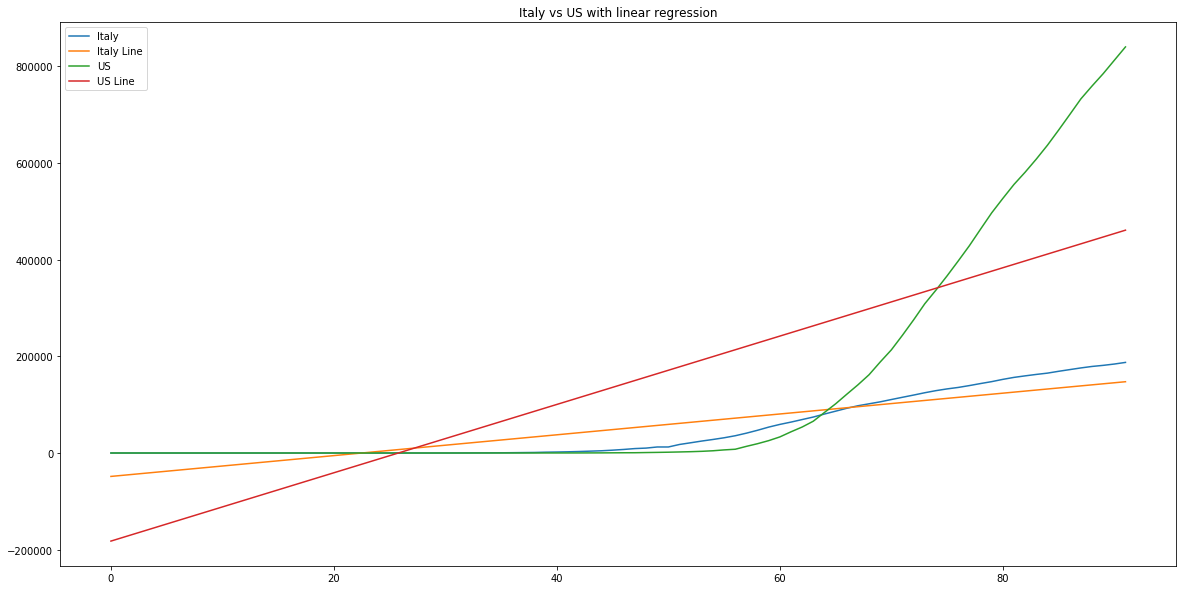

In [20]:
plt.title("Italy vs US with linear regression")
plt.plot(ItalyValues, label="Italy")
plt.plot(ItalyPrediction, label="Italy Line")
plt.plot(USValues, label="US")
plt.plot(USPrediction, label="US Line")
plt.legend()
plt.show()

In [21]:
print("Italy Intercept: ", ItalyRegressor.intercept_)
print("Italy Slope: ", ItalyRegressor.coef_)

print("US Intercept: ", USRegressor.intercept_)
print("US Slope: ", USRegressor.coef_)

Italy Intercept:  [-48404.11991585]
Italy Slope:  [[2151.65457053]]
US Intercept:  [-182122.45371669]
US Slope:  [[7064.5945394]]


For test purposes, I only wanted to graph two linear trends to make it easier to compare the two as well as not overload the graph with different colored lines. The linear regressor calculated the overall growth rate for these confirmed cases.

# Ignore preceding zeroes: Linear Regression
Let's ignore the preceding zeroes as they may detract from the overall rate of confirmed cases. We will use the same fit and predict functions to generate the line.

In [22]:
def removeZeroes(DataValues):
    DataNoZero = []
    DataNewIndex = []
    count = 0
    for i in DataValues:
        if i==0:
            continue
        else:
            DataNewIndex.append(count)
            DataNoZero.append(i)
            count = count + 1
    return DataNewIndex, DataNoZero

In [23]:
ItalyValueIndex, ItalyNoZero = removeZeroes(ItalyValues)
USValueIndex, USNoZero = removeZeroes(USValues)

In [24]:
USValueRegressor = LinearRegression()
USValueRegressor.fit(np.array(USValueIndex).reshape(-1,1), np.array(USNoZero).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
ItalyValueRegressor = LinearRegression()
ItalyValueRegressor.fit(np.array(ItalyValueIndex).reshape(-1,1), np.array(ItalyNoZero).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
ItalyNewPrediction = ItalyValueRegressor.predict(np.array(ItalyValueIndex).reshape(-1,1))
USNewPrediction = USValueRegressor.predict(np.array(USValueIndex).reshape(-1,1))

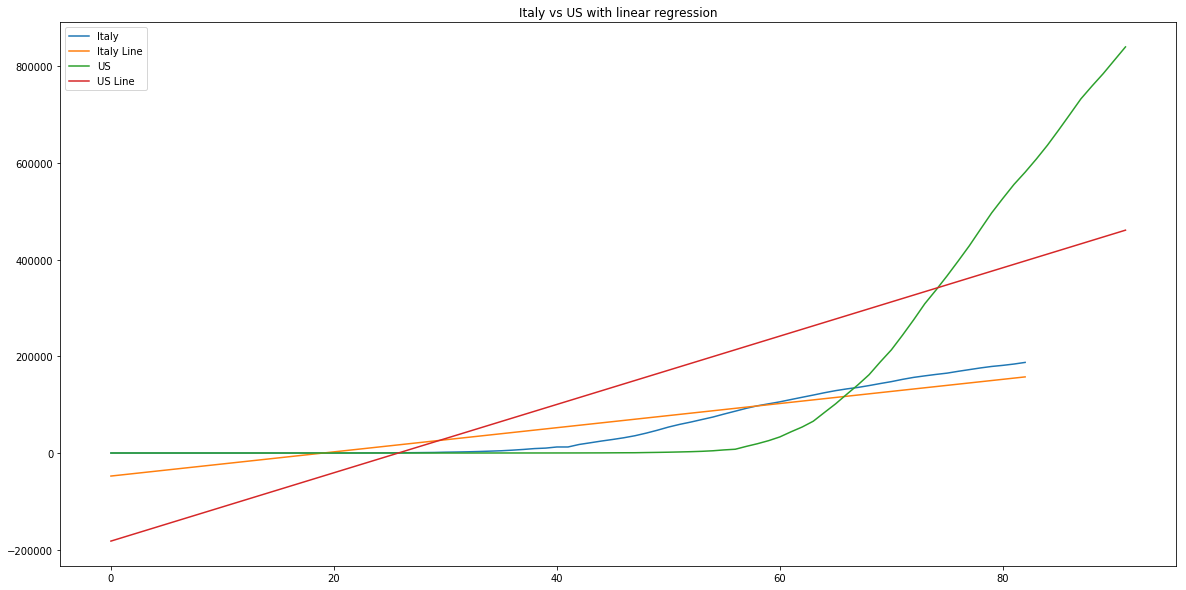

In [27]:
plt.title("Italy vs US with linear regression")
plt.plot(ItalyNoZero, label="Italy")
plt.plot(ItalyNewPrediction, label="Italy Line")
plt.plot(USNoZero, label="US")
plt.plot(USNewPrediction, label="US Line")
plt.legend()
plt.show()

In [28]:
print("Italy Intercept: ", ItalyValueRegressor.intercept_)
print("Italy Slope: ", ItalyValueRegressor.coef_)
print("US Intercept: ", USValueRegressor.intercept_)
print("US Slope: ", USValueRegressor.coef_)

Italy Intercept:  [-47644.86574871]
Italy Slope:  [[2500.19713698]]
US Intercept:  [-182122.45371669]
US Slope:  [[7064.5945394]]


We can see that values of the linear function did not drastically change but we can see the trend lines much more clearly.

# Per Million: Linear Regression

Lets apply this linear regression function to the scaled data from above.

In [29]:
ItalyScaleIndex = getIndex(ItalyScale)
USScaleIndex = getIndex(USScale)

In [30]:
USScaleRegressor = LinearRegression()
USScaleRegressor.fit(np.array(USScaleIndex).reshape(-1,1), np.array(USScale).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
ItalyScaleRegressor = LinearRegression()
ItalyScaleRegressor.fit(np.array(ItalyScaleIndex).reshape(-1,1), np.array(ItalyScale).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
ItalyScalePred = ItalyScaleRegressor.predict(np.array(ItalyScaleIndex).reshape(-1,1))
USScalePred = USScaleRegressor.predict(np.array(USScaleIndex).reshape(-1,1))

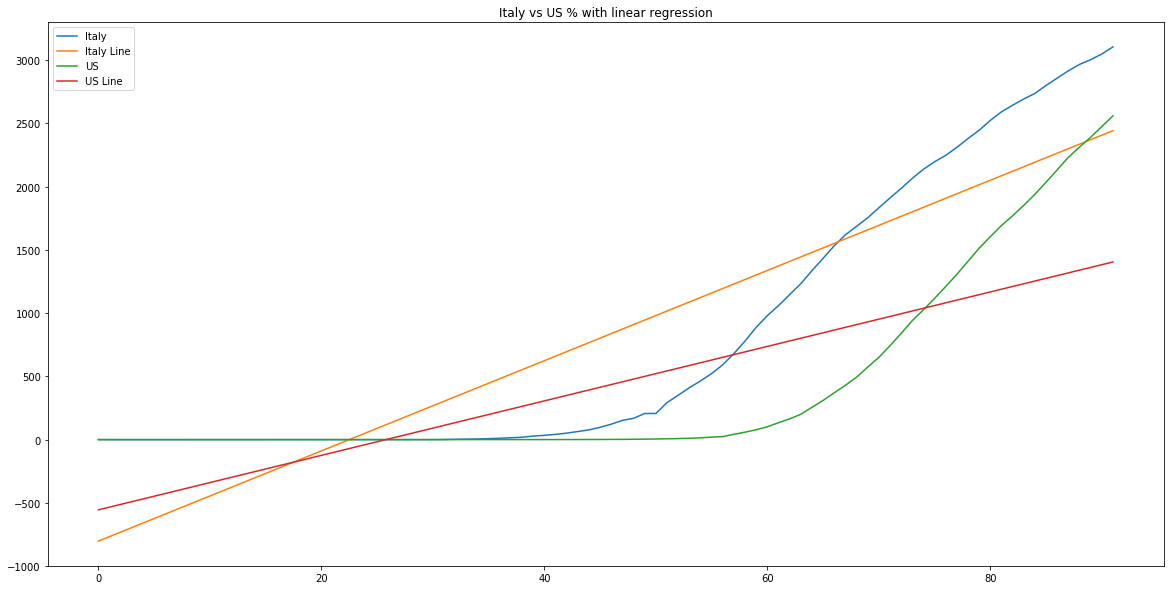

In [33]:
plt.title("Italy vs US % with linear regression")
plt.plot(ItalyScale, label="Italy")
plt.plot(ItalyScalePred, label="Italy Line")
plt.plot(USScale, label="US")
plt.plot(USScalePred, label="US Line")
plt.legend()
plt.show()

In [34]:
print("Italy percent intercept: ", ItalyScaleRegressor.intercept_)
print("Italy percent slope: ", ItalyScaleRegressor.coef_)
print("US percent intercept: ", USScaleRegressor.intercept_)
print("US percent slope: ", USScaleRegressor.coef_)

Italy percent intercept:  [-801.9237892]
Italy percent slope:  [[35.64702734]]
US percent intercept:  [-554.91302168]
US percent slope:  [[21.52527282]]


We have imposed a linear regression over the per million scale of the confirmed cases of the population. Now, we can see that Italy's rate of change is more than double that of the US's. This is a more accurate comparison of these country's respective rates as they are both on the same scale.

# Rate of confirmed cases
Let's calculate the daily difference of the confirmed cases to illustrate the overall trend.

difference: take the current point and subtract it from the previous point to get the daily difference

In [35]:
def difference(DataValues):
    DataDifference = DataValues.copy()
    for i in range(len(DataDifference) -1, 0, -1):
        DataDifference[i] = DataDifference[i] - DataDifference[i-1]
    DataDifference[0] = 0
    return DataDifference

In [36]:
ItalyDifference = difference(ItalyValues)
USDifference = difference(USValues)

In [37]:
SpainDifference = difference(SpainValues)

In [38]:
GermanyDifference = difference(GermanyValues)

In [39]:
SingaporeDifference = difference(SingaporeValues)

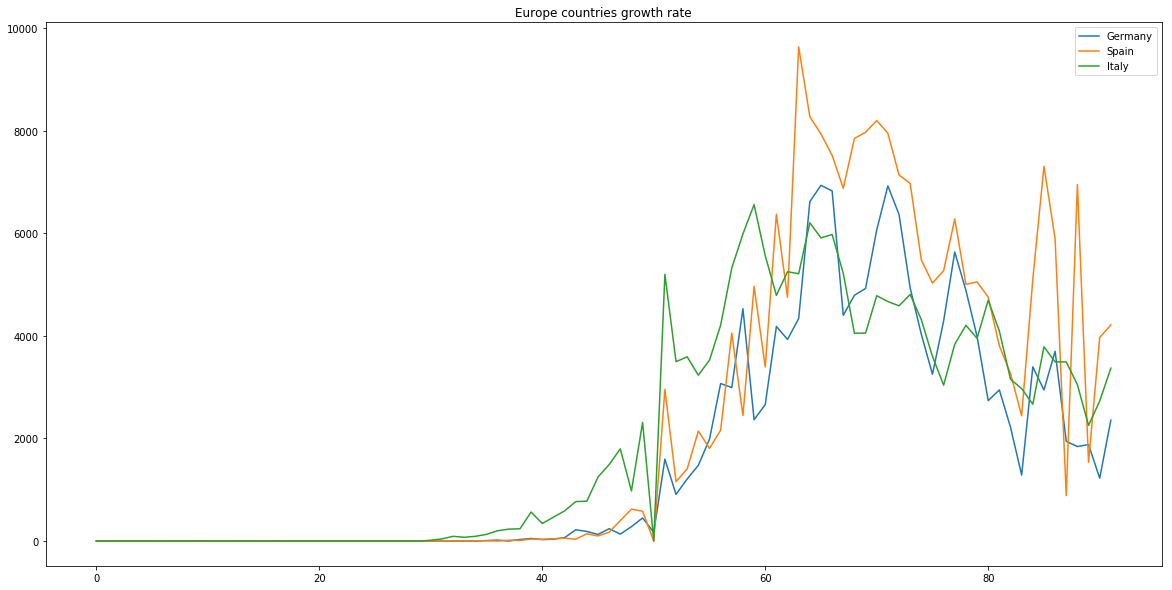

In [40]:
plt.title("Europe countries growth rate")
plt.plot(GermanyDifference, label="Germany")
plt.plot(SpainDifference, label="Spain")
plt.plot(ItalyDifference, label="Italy")
plt.legend()
plt.show()


These 3 European countries seem to illustrate similar patterns regarding the rate of confirmed cases.

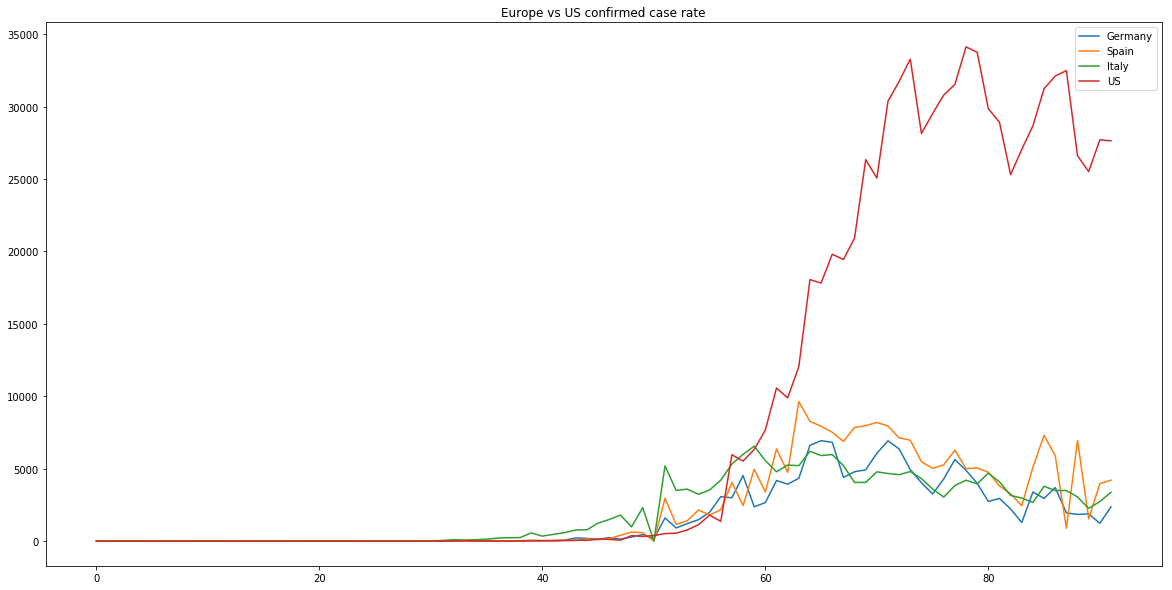

In [41]:
plt.title("Europe vs US confirmed case rate")
plt.plot(GermanyDifference, label="Germany")
plt.plot(SpainDifference, label="Spain")
plt.plot(ItalyDifference, label="Italy")
plt.plot(USDifference, label="US")
plt.legend()
plt.show()

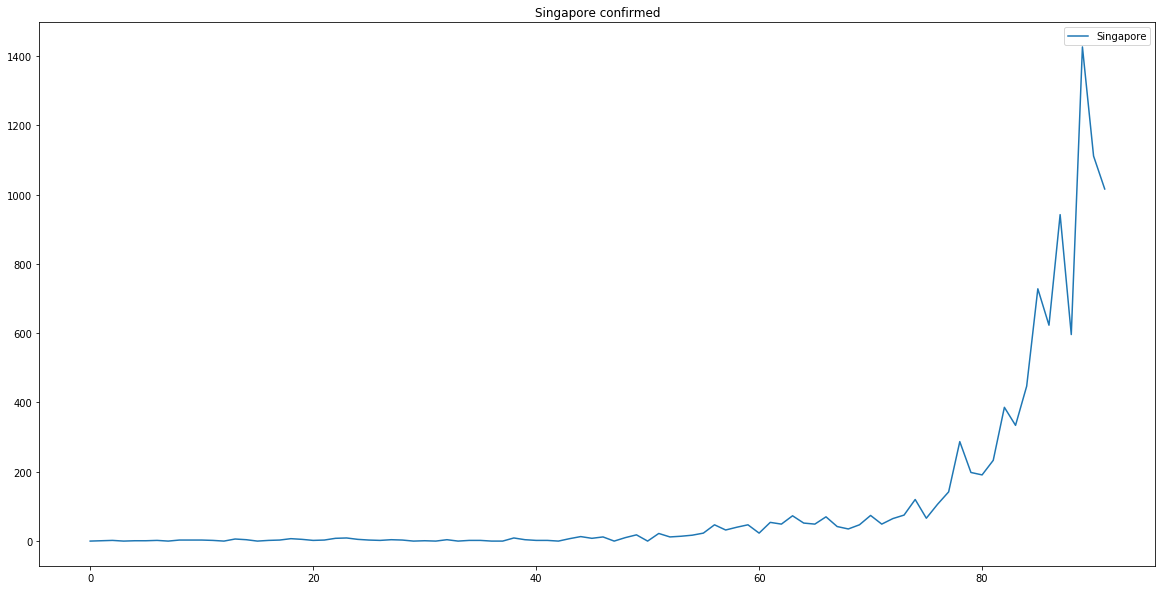

In [42]:
plt.title("Singapore confirmed")
plt.plot(SingaporeDifference, label="Singapore")
plt.legend()
plt.show()

On the other hand, the US's rate of confirmed cases had a higher spike of cases compared to these 3 European countries. Again, this is because the US is much larger than these respective countries. It's interesting to see how Singapore initially had a really low number of cases and all of a sudden started spiking.

# The Curve
Lets apply a 7 day moving average on the difference of the scaled data. This way, we can put all the data on the same scale and see how each country's cases is growing and decreasing

In [43]:
ItalyMillDiff = difference(ItalyScale)
Italyconfirmed = pd.DataFrame(list(zip(ItalyMillDiff)),columns=['confirmed'])
Italycurve = Italyconfirmed['confirmed'].rolling(window=7, center=False).mean()

In [44]:
USMillDiff = difference(USScale)
USconfirmed = pd.DataFrame(list(zip(USMillDiff)), columns=['confirmed'])
UScurve = USconfirmed['confirmed'].rolling(window=7, center=False).mean()

SpainMillDiff = difference(SpainScale)
Spainconfirmed = pd.DataFrame(list(zip(SpainMillDiff)), columns=['confirmed'])
Spaincurve = Spainconfirmed['confirmed'].rolling(window=7, center=False).mean()

GermanyMillDiff = difference(GermanyScale)
Germanyconfirmed = pd.DataFrame(list(zip(GermanyMillDiff)), columns=['confirmed'])
Germanycurve = Germanyconfirmed['confirmed'].rolling(window=7, center=False).mean()

SingaporeMillDiff = difference(SingaporeScale)
Singaporeconfirmed = pd.DataFrame(list(zip(SingaporeMillDiff)), columns=['confirmed'])
Singaporecurve = Singaporeconfirmed['confirmed'].rolling(window=7, center=False).mean()

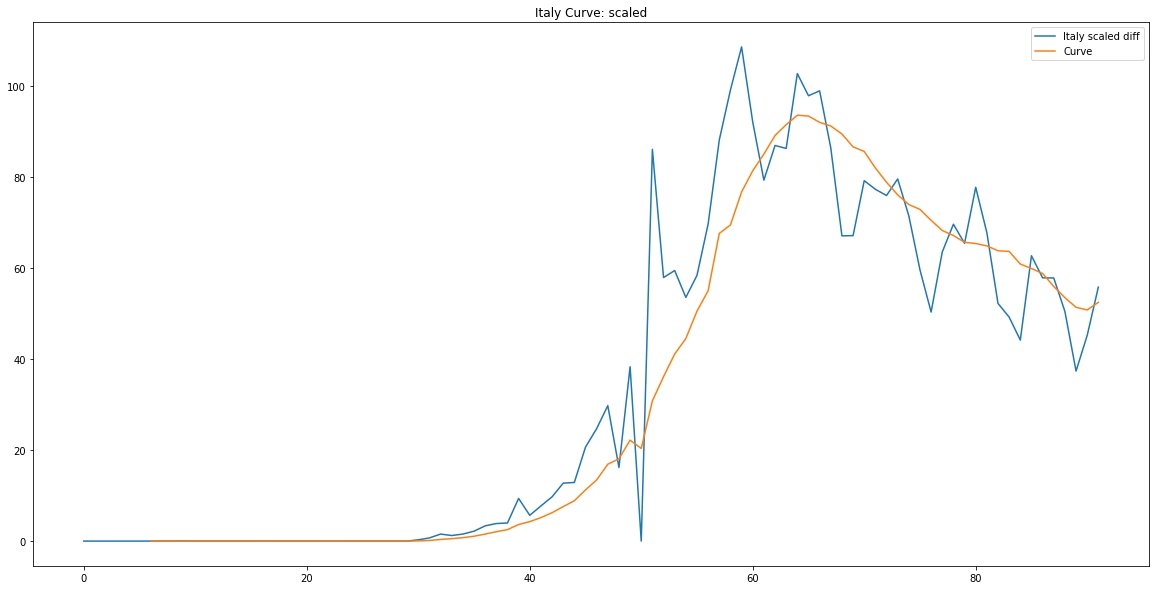

In [45]:
plt.title("Italy Curve: scaled")
plt.plot(ItalyMillDiff, label="Italy scaled diff")
plt.plot(Italycurve, label="Curve")
plt.legend()
plt.show()

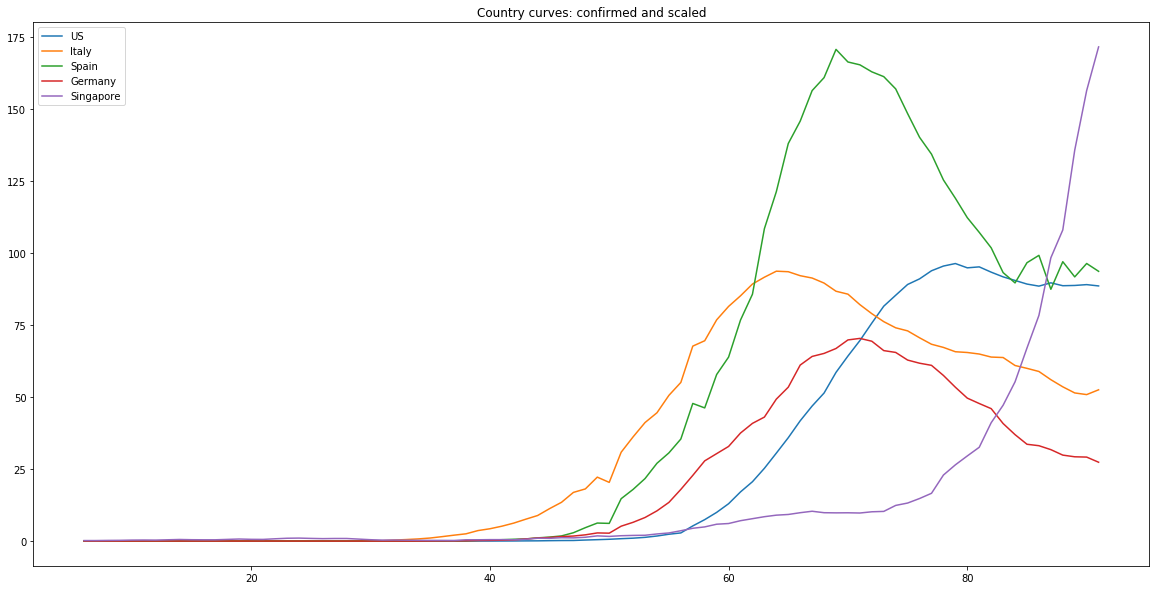

In [46]:
plt.title("Country curves: confirmed and scaled")
plt.plot(UScurve, label="US")
plt.plot(Italycurve, label="Italy")
plt.plot(Spaincurve, label="Spain")
plt.plot(Germanycurve, label="Germany")
plt.plot(Singaporecurve, label="Singapore")
plt.legend()
plt.show()

## Other methods to explore
- group by latitude
    - see if temperature is going to affect the number of cases

# Death Rate
Similarly, we pull in the number of deaths into a pandas dataframe and can perform the same calculations.

In [47]:
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
death = pd.read_csv(url_death)
death.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,0.064394,0.068182,0.098485,0.159091,0.212121,0.310606,0.496212,0.503788,...,452.617424,477.253788,508.291667,544.750000,582.708333,604.200758,625.162879,643.882576,668.871212,693.276515
std,24.734994,70.669996,1.046278,1.047853,1.479183,2.462894,3.201783,4.678456,7.693263,7.693757,...,2511.497469,2652.153139,2827.073046,3069.896212,3297.852093,3421.096666,3546.524634,3649.443598,3801.250174,3942.360359
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,5.000000,5.000000,5.000000,5.500000,6.000000,6.000000,6.000000,6.500000,7.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.250000,31.000000,33.250000,35.250000,37.250000,38.250000,41.250000,42.250000,43.500000,44.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,23538.000000,25843.000000,28338.000000,32930.000000,36787.000000,38664.000000,40661.000000,42094.000000,44444.000000,46583.000000


In [48]:
def getCountryDeath(country):
    CountryData = death[data['Country/Region']==country]
    return CountryData

In [49]:
USDeath = getCountryDeath("US")
USDeathValues = getValues(USDeath)

USIndex, USDeathNoZero = removeZeroes(USDeathValues)
USDeathScale = countryScale(USDeathValues, usPop)
USDeathDiff = difference(USDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [50]:
ItalyDeath = getCountryDeath("Italy")
ItalyDeathValues = getValues(ItalyDeath)

ItalyIndex, ItalyDeathNoZero = removeZeroes(ItalyDeathValues)
ItalyDeathScale = countryScale(ItalyDeathValues, italyPop)
ItalyDeathDiff = difference(ItalyDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [51]:
GermanyDeath = getCountryDeath("Germany")
GermanyDeathValues = getValues(GermanyDeath)

GermanyIndex, GermanyDeathNoZero = removeZeroes(GermanyDeathValues)
GermanyDeathScale = countryScale(GermanyDeathValues, germanyPop)
GermanyDeathDiff = difference(GermanyDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [52]:
SpainDeath = getCountryDeath("Spain")
SpainDeathValues = getValues(SpainDeath)

SpainIndex, SpainDeathNoZero = removeZeroes(SpainDeathValues)
SpainDeathScale = countryScale(SpainDeathValues, spainPop)
SpainDeathDiff = difference(SpainDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


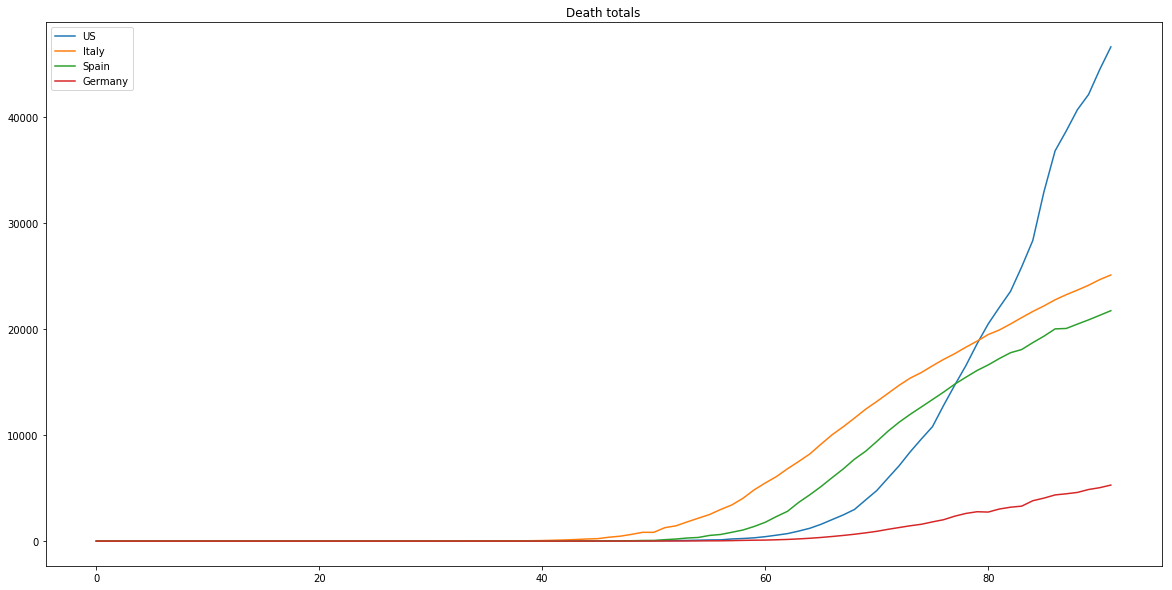

In [53]:
plt.title("Death totals")
plt.plot(USDeathValues, label="US")
plt.plot(ItalyDeathValues, label="Italy")
plt.plot(SpainDeathValues, label="Spain")
plt.plot(GermanyDeathValues, label="Germany")
plt.legend()
plt.show()

The number of deaths per country

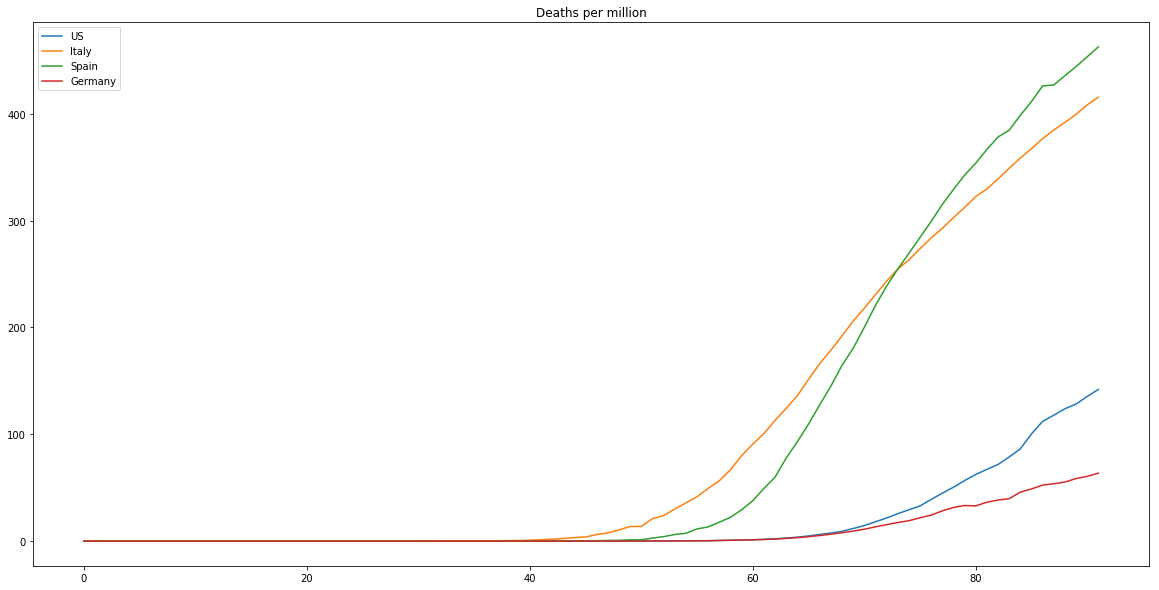

In [54]:
plt.title("Deaths per million")
plt.plot(USDeathScale, label="US")
plt.plot(ItalyDeathScale, label="Italy")
plt.plot(SpainDeathScale, label="Spain")
plt.plot(GermanyDeathScale, label="Germany")
plt.legend()
plt.show()

Number of deaths per million

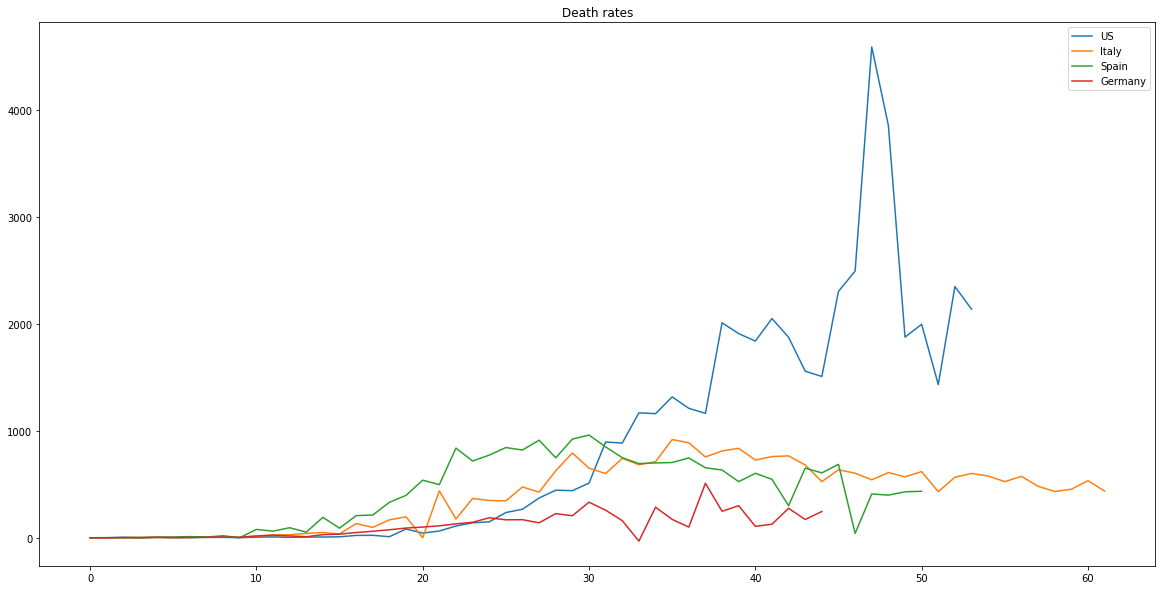

In [55]:
plt.title("Death rates")
plt.plot(USDeathDiff, label="US")
plt.plot(ItalyDeathDiff, label="Italy")
plt.plot(SpainDeathDiff, label="Spain")
plt.plot(GermanyDeathDiff, label="Germany")
plt.legend()
plt.show()

Here we illustrate the rate of the deaths per these 4 countries. The US is leading in these numbers while Italy, Spain and Germany perform overall the same.

# Findings
- Stay at home policy
    - Countries issuing a mandatory stay at home policy earlier than other countries helped prevent the rapid spread of COVID-19. We saw a slower of a rate of confirmed cases compared to countries who implemented this restriction later.
- Experimental drug might be working
    - Although the US had some of the highest spikes, once the President announced the use of the experimental drug, we saw a slow decrease in the rate of confirmed cases
- Scale your data!
    - After applying the scaling function to the data, we were able to more accurately illustrate and compare the confirmed cases and deaths per country. This was a better way to show the overall impact of the spread of COVID compared to looking at the overall numbers.
    
    
### Stay safe, y'all